In [61]:
% matplotlib inline
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from skimage.io import imread

In [44]:
data = loadmat('ex7data2.mat')
X = data['X']

In [107]:
def distances(X, mu):
    diff = X - mu
    return np.square(diff).sum(axis=1)
    
def kmeans(X, clusters, n_iters=1000):
    clusters = clusters.copy()
    
    c = np.zeros(len(X)).astype('int')
    for _ in range(n_iters):
        for i in range(len(c)):
            c[i] = np.argmin(distances(X[i, :], clusters))
        
        for i in range(len(clusters)):
            clusters[i] = X[c == i, :].mean(axis=0)
    
    return (c.sum(), clusters, c)

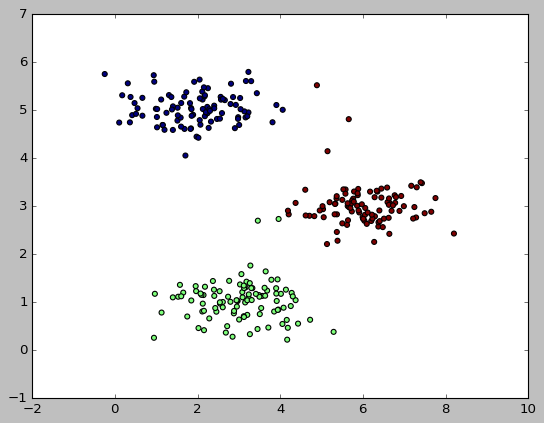

In [80]:
clusters = np.asarray([[3, 3], [6, 2], [8, 5]]).astype('float32')
(cost, clusters, c) = kmeans(X, clusters, n_iters=10)

plt.scatter(X[:, 0], X[:, 1], c=c)

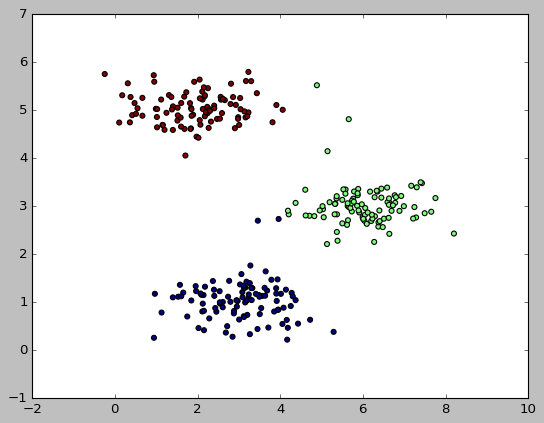

In [59]:
k = 3
indices = np.arange(len(X))
np.random.shuffle(indices)
clusters = X[indices[:k], :]
(cost, clusters, c) = kmeans(X, clusters, n_iters=10)

plt.scatter(X[:, 0], X[:, 1], c=c)

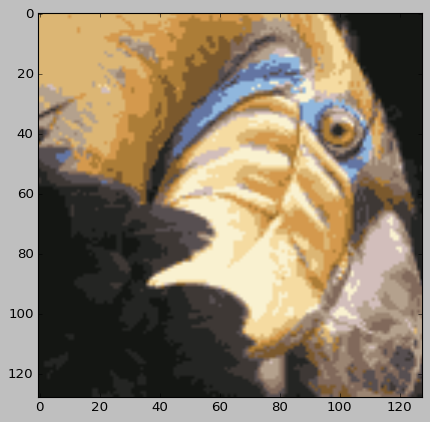

In [108]:
A = imread('bird_small.png').astype('float32')
B = np.zeros(A.shape)
A = A.reshape((-1, 3))
B = B.reshape(A.shape)

k = 16
indices = np.arange(len(A))
np.random.shuffle(indices)
clusters = A[indices[:k], :]
(cost, clusters, c) = kmeans(A, clusters, n_iters=100)

for i in range(len(B)):
    B[i, :] = clusters[c[i]]

B = B.reshape((128, 128, 3)).astype('uint8')
A = A.reshape(B.shape)

plt.imshow(B)